<a href="https://colab.research.google.com/github/AwaisAli37405/Deep_Learning_with_fast_ai/blob/master/Deep_Learning_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [2]:
# !pip install -U fastprogress fastai

### In order to use the built in datasets available in fast ai untar_data. It can be downloaded and decompresses using the following line of code:

In [11]:
path = untar_data(URLs.PETS)/'images'
print(path)
path.ls()

/root/.fastai/data/oxford-iiit-pet/images


(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_37.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_53.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_156.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_56.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_74.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_194.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_131.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_74.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_155.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/pug_139.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_111.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_136.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_81.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_126.jpg'), Path('/

### IT will download the dataset once and will return the location. Now we will use the factory method that is a great way to get your data quickly ready for training - get image file. It is a fastai function that helps us grab all the image files (recursively) in one folder.

In [14]:
files = get_image_files(path)
len(files)


7390

### Now to get this data labeled following convention has been adopted in fast.ai. There is an easy way to distinguish: the name of the file begins with a capital for cats, and a lowercased letter for dogs

In [22]:
def is_cat(x): return x[0].isupper()


### To get our data ready for the model we need to initialize the dataloader object.
### There is function in Vision_data of fast_ai that can label the examples using names of the image files imagedataloader.from_name_fucntion

### We have passed to this function the directory we’re working in, the files we grabbed, our label_func and one last piece as item_tfms: this is a Transform applied on all items of our dataset that will resize each image to 224 by 224, by using a random crop on the largest dimension to make it a square, then resizing to 224 by 224. If we didn’t pass this, we would get an error later as it would be impossible to batch the items together.

In [23]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))



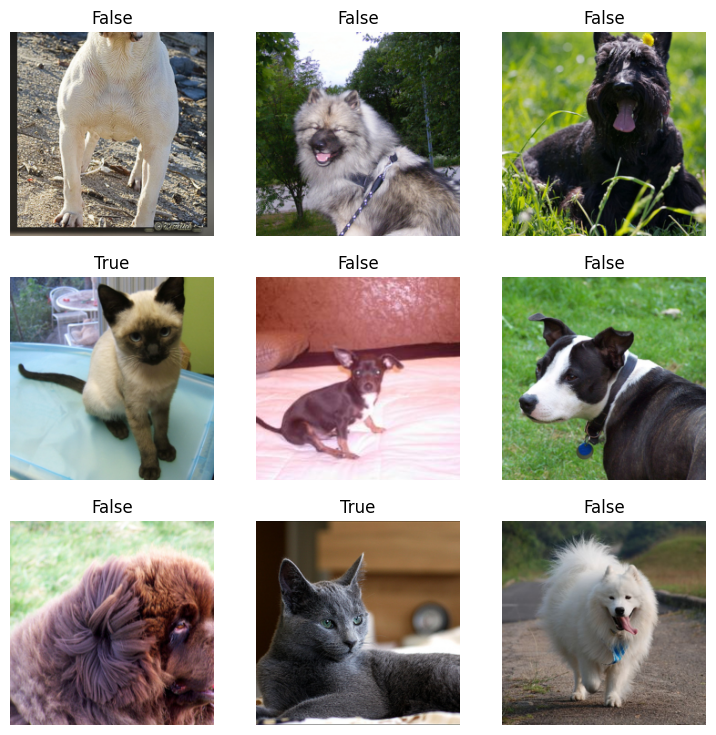

In [24]:
dls.show_batch()

### Then we can create a Learner, which is a fastai object that combines the data and a model for training, and uses transfer learning to fine tune a pretrained model in just two lines of code:

In [25]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.149787,0.018532,0.007442,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.052900,0.015219,0.004736,00:42


### If you want to make a prediction on a new image, you can use learn.predict:

In [26]:
learn.predict(files[0])

('False', tensor(0), tensor([9.9979e-01, 2.0552e-04]))

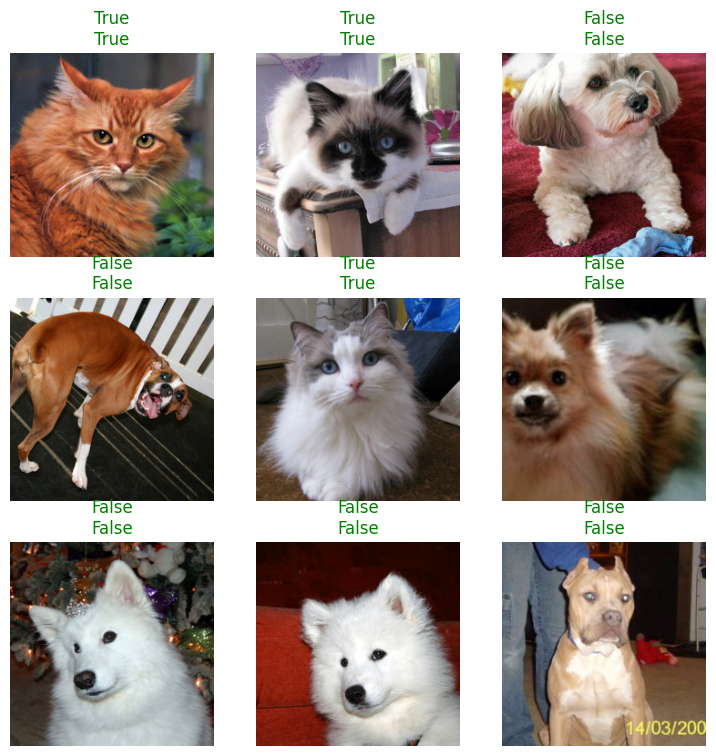

In [27]:
learn.show_results()

In [33]:
?vision_learner